In [16]:
# Imports
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

from data.cifake_data_module import CIFAKEDataModule
import config
from data.helper import compute_mean_and_std

# Data Visualization
Visualizing your data is key to understanding if the transforms you set make sense for your problem statement.

In [17]:
dm = CIFAKEDataModule(
    cache_file=config.CACHE_FILE,
    data_dir=config.DATASET_DIR,
    batch_size=config.BATCH_SIZE,
    num_workers=config.NUM_WORKERS,
    valid_size=config.VALID_SIZE
)

dm.prepare_data()
dm.setup('')
train_loader = dm.train_dataloader()

Reusing cached mean and std


In [18]:
def visualize_one_batch(data_loader, max_n: int = 5):
    """
    Visualize one batch of data.

    :param data_loaders: dictionary containing data loaders
    :param max_n: maximum number of images to show
    :return: None
    """

    # obtain one batch of training images
    # First obtain an iterator from the train dataloader
    dataiter  = iter(data_loader)
    # Then call the .next() method on the iterator you just
    # obtained
    images, labels  = next(dataiter)
    print(images[0].shape)
    
    # print(images[0])
    
    # Undo the normalization (for visualization purposes)
    # mean, std = compute_mean_and_std(config.CACHE_FILE)
    # print(mean, std)
    # invTrans = transforms.Compose(
    #     [
    #         transforms.Normalize(mean=[0.0, 0.0, 0.0], std=1 / std),
    #         transforms.Normalize(mean=-mean, std=[1.0, 1.0, 1.0]),
    #     ]
    # )

    # images = invTrans(images)
    print(images[0])

    # YOUR CODE HERE:
    # Get class names from the train data loader
    class_names  = data_loader.dataset.classes
    print(class_names)

    # Convert from BGR (the format used by pytorch) to
    # RGB (the format expected by matplotlib)
    images = torch.permute(images, (0, 2, 3, 1)).clip(0, 1)

    # plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(25, 4))
    for idx in range(max_n):
        ax = fig.add_subplot(1, max_n, idx + 1, xticks=[], yticks=[])
        ax.imshow(images[idx])
        # print out the correct label for each image
        # .item() gets the value contained in a Tensor
        ax.set_title(class_names[labels[idx].item()])

torch.Size([3, 32, 32])
tensor([[[0.3294, 0.3490, 0.3765,  ..., 0.3255, 0.3020, 0.2863],
         [0.3765, 0.3922, 0.4196,  ..., 0.4588, 0.5098, 0.5333],
         [0.4510, 0.4588, 0.4745,  ..., 0.6784, 0.6863, 0.6824],
         ...,
         [0.3059, 0.2941, 0.2784,  ..., 0.0745, 0.0627, 0.0667],
         [0.3725, 0.3529, 0.3255,  ..., 0.0824, 0.0745, 0.0784],
         [0.2745, 0.2824, 0.2980,  ..., 0.0667, 0.0549, 0.0588]],

        [[0.3294, 0.3490, 0.3765,  ..., 0.3255, 0.3020, 0.2863],
         [0.3765, 0.3922, 0.4196,  ..., 0.4588, 0.5098, 0.5333],
         [0.4510, 0.4588, 0.4745,  ..., 0.6784, 0.6863, 0.6824],
         ...,
         [0.3059, 0.2941, 0.2784,  ..., 0.0745, 0.0627, 0.0667],
         [0.3725, 0.3529, 0.3255,  ..., 0.0824, 0.0745, 0.0784],
         [0.2745, 0.2824, 0.2980,  ..., 0.0667, 0.0549, 0.0588]],

        [[0.3294, 0.3490, 0.3765,  ..., 0.3255, 0.3020, 0.2863],
         [0.3765, 0.3922, 0.4196,  ..., 0.4588, 0.5098, 0.5333],
         [0.4510, 0.4588, 0.4745, 

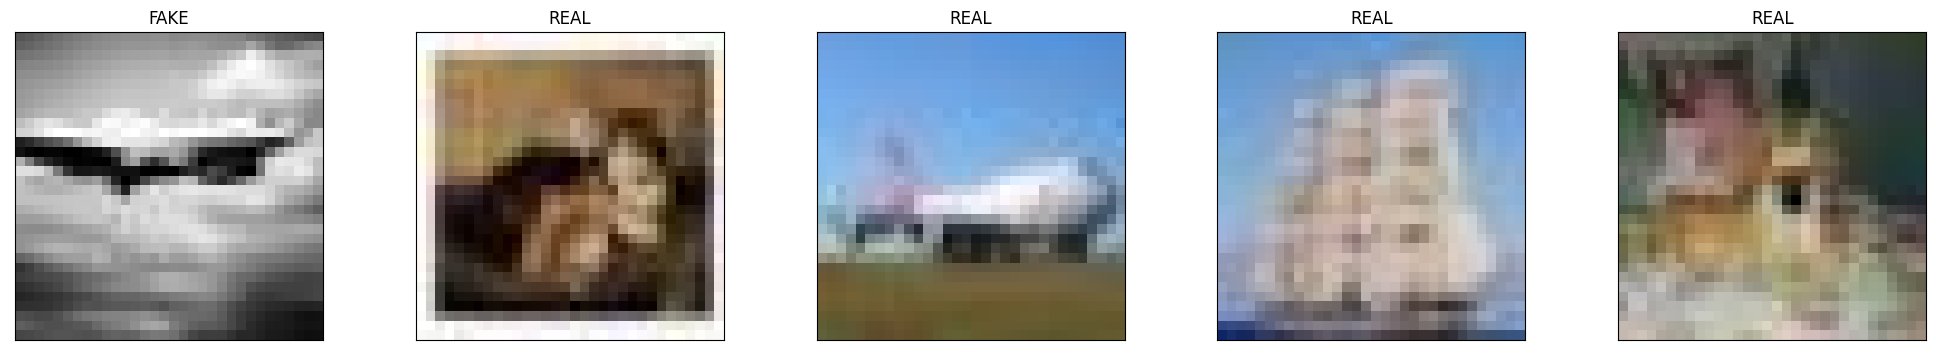

In [22]:
visualize_one_batch(data_loader=train_loader)